In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-12-07 08:47:07] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-07 08:47:08] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-07 08:47:08] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-12-07 08:47:18] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-07 08:47:18] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-07 08:47:18] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-07 08:47:18] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2023-12-07 08:47:19] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-07 08:47:19] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Initialize a list to store models
models_m = []

# Loop over each path and load the model
for path in finetuned_model_path_m:
    model_m = my_nas.load(path_model,path)  # Load the model using the current path
    models_m.append(model_m)




[2023-12-07 08:47:20] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 08:47:22] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 08:47:23] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 08:47:24] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2023-12-07 08:47:25] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth EMA checkpoint.


In [5]:
evaluation_results_m = []

for model in models_m:
    metrics_m = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_m.append(metrics_m)

[2023-12-07 08:47:25] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:   0%|          | 0/100 [00:00<?, ?it/s]

model yolo_nas_m loaded


Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 6/6 [02:20<00:00, 23.34s/it]
[2023-12-07 08:49:46] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parall

In [6]:
evaluation_results_m


[{'Precision@0.50': 0.5872193574905396,
  'Recall@0.50': 0.28691983222961426,
  'mAP@0.50': 0.23032288253307343,
  'F1@0.50': 0.38548752665519714,
  'Precision@0.50:0.95': 0.2867012321949005,
  'Recall@0.50:0.95': 0.1400843858718872,
  'mAP@0.50:0.95': 0.09797034412622452,
  'F1@0.50:0.95': 0.18820862472057343},
 {'Precision@0.50': 0.5637680888175964,
  'Recall@0.50': 0.3282700479030609,
  'mAP@0.50': 0.26957982778549194,
  'F1@0.50': 0.41493335366249084,
  'Precision@0.50:0.95': 0.26144927740097046,
  'Recall@0.50:0.95': 0.15223629772663116,
  'mAP@0.50:0.95': 0.10828546434640884,
  'F1@0.50:0.95': 0.1924266815185547},
 {'Precision@0.50': 0.5625,
  'Recall@0.50': 0.3113923966884613,
  'mAP@0.50': 0.25442883372306824,
  'F1@0.50': 0.40086907148361206,
  'Precision@0.50:0.95': 0.25167685747146606,
  'Recall@0.50:0.95': 0.13932490348815918,
  'mAP@0.50:0.95': 0.09501943737268448,
  'F1@0.50:0.95': 0.1793590486049652},
 {'Precision@0.50': 0.5959596037864685,
  'Recall@0.50': 0.34852319955

In [7]:
path_model = 'yolo_nas_l' 



finetuned_model_path_l = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth"]



In [8]:
models_l = []

# Loop over each path and load the model
for path in finetuned_model_path_l:
    model_l = my_nas.load(path_model,path)  
    models_l.append(model_l)

Testing: 100%|██████████| 6/6 [02:20<00:00, 23.50s/it]
[2023-12-07 08:59:07] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_l_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 08:59:09] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 08:59:10] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_l_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 08:59:12] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_l_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_l loaded


[2023-12-07 08:59:13] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_l_200_1/ckpt_best.pth EMA checkpoint.


In [9]:
evaluation_results_l = []

for model in models_l:
    metrics_l = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  # Replace with your evaluation function
    evaluation_results_l.append(metrics_l)

[2023-12-07 08:59:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


model yolo_nas_l loaded


Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 6/6 [03:20<00:00, 33.47s/it]
[2023-12-07 09:02:35] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parall

In [10]:
evaluation_results_l
#evaluation_results_m

[{'Precision@0.50': 0.5436046719551086,
  'Recall@0.50': 0.3156118094921112,
  'mAP@0.50': 0.2511214315891266,
  'F1@0.50': 0.3993593156337738,
  'Precision@0.50:0.95': 0.257848858833313,
  'Recall@0.50:0.95': 0.14970463514328003,
  'mAP@0.50:0.95': 0.10827808082103729,
  'F1@0.50:0.95': 0.18942873179912567},
 {'Precision@0.50': 0.6167664527893066,
  'Recall@0.50': 0.3476793169975281,
  'mAP@0.50': 0.2920050621032715,
  'F1@0.50': 0.4446842670440674,
  'Precision@0.50:0.95': 0.28742513060569763,
  'Recall@0.50:0.95': 0.1620253026485443,
  'mAP@0.50:0.95': 0.11792763322591782,
  'F1@0.50:0.95': 0.2072315216064453},
 {'Precision@0.50': 0.5298507213592529,
  'Recall@0.50': 0.3594936728477478,
  'mAP@0.50': 0.28825879096984863,
  'F1@0.50': 0.42835596203804016,
  'Precision@0.50:0.95': 0.2441542148590088,
  'Recall@0.50:0.95': 0.1656540036201477,
  'mAP@0.50:0.95': 0.11650657653808594,
  'F1@0.50:0.95': 0.19738562405109406},
 {'Precision@0.50': 0.60546875,
  'Recall@0.50': 0.39240506291389

In [11]:
evaluation_results_m

[{'Precision@0.50': 0.5872193574905396,
  'Recall@0.50': 0.28691983222961426,
  'mAP@0.50': 0.23032288253307343,
  'F1@0.50': 0.38548752665519714,
  'Precision@0.50:0.95': 0.2867012321949005,
  'Recall@0.50:0.95': 0.1400843858718872,
  'mAP@0.50:0.95': 0.09797034412622452,
  'F1@0.50:0.95': 0.18820862472057343},
 {'Precision@0.50': 0.5637680888175964,
  'Recall@0.50': 0.3282700479030609,
  'mAP@0.50': 0.26957982778549194,
  'F1@0.50': 0.41493335366249084,
  'Precision@0.50:0.95': 0.26144927740097046,
  'Recall@0.50:0.95': 0.15223629772663116,
  'mAP@0.50:0.95': 0.10828546434640884,
  'F1@0.50:0.95': 0.1924266815185547},
 {'Precision@0.50': 0.5625,
  'Recall@0.50': 0.3113923966884613,
  'mAP@0.50': 0.25442883372306824,
  'F1@0.50': 0.40086907148361206,
  'Precision@0.50:0.95': 0.25167685747146606,
  'Recall@0.50:0.95': 0.13932490348815918,
  'mAP@0.50:0.95': 0.09501943737268448,
  'F1@0.50:0.95': 0.1793590486049652},
 {'Precision@0.50': 0.5959596037864685,
  'Recall@0.50': 0.34852319955

In [12]:
###########for the small model ######################

In [13]:
path_model = 'yolo_nas_s' 



finetuned_model_path_s = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth"]


In [14]:
models_s = []

# Loop over each path and load the model
for path in finetuned_model_path_s:
    model_s = my_nas.load(path_model,path)  
    models_s.append(model_s)

Testing: 100%|██████████| 6/6 [03:43<00:00, 37.26s/it]
[2023-12-07 09:15:40] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n10_yolo_na_i1_exp_yolo_nas_s_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 09:15:40] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n25_yolo_na_i1_exp_yolo_nas_s_25_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 09:15:41] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n50_yolo_na_i1_exp_yolo_nas_s_50_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 09:15:41] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n100_yolo_na_i1_exp_yolo_nas_s_100_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_s loaded


[2023-12-07 09:15:42] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/n200_yolo_na_i1_exp_yolo_nas_s_200_1/ckpt_best.pth EMA checkpoint.


In [15]:
evaluation_results_s = []

for model in models_s:
    metrics_s = my_nas.evaluate_trained_model(model, data_yaml_path, "test")  
    evaluation_results_s.append(metrics_s)

[2023-12-07 09:15:42] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations:   0%|          | 0/100 [00:00<?, ?it/s]

model yolo_nas_s loaded


Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 6/6 [01:31<00:00, 15.17s/it]
[2023-12-07 09:17:13] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Testing:   0%|          | 0/6 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parall

Testing: 100%|██████████| 6/6 [01:31<00:00, 15.24s/it]


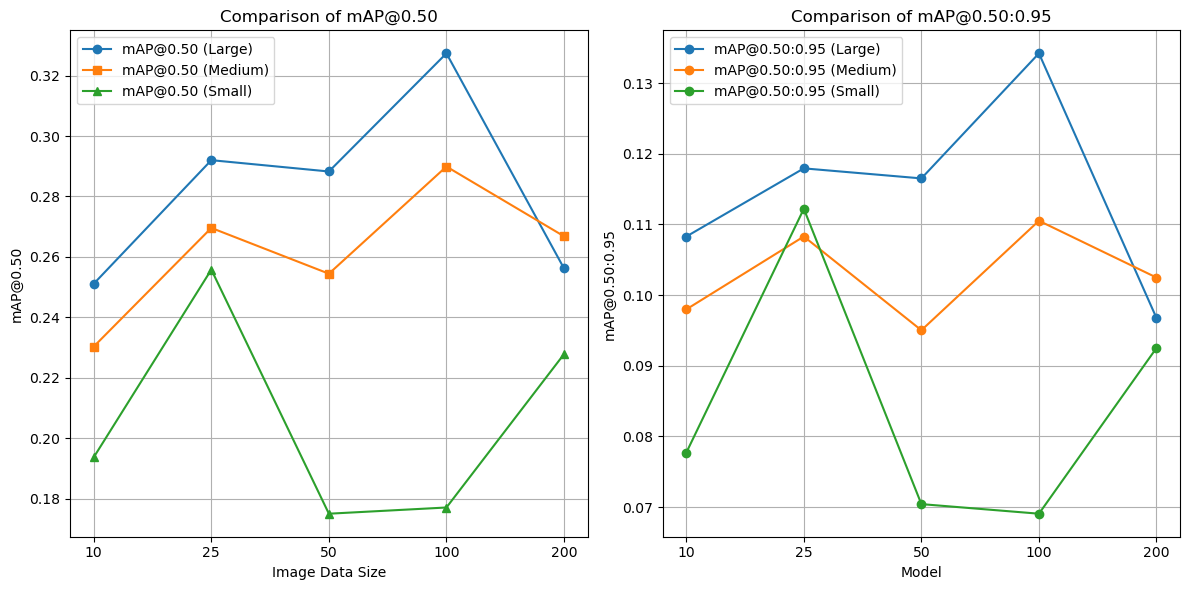

In [16]:

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['10', '25', '50', '100', '200']

# Plotting
plt.figure(figsize=(12, 6))

# mAP@0.50 Plot
plt.subplot(1, 2, 1)
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')
plt.title('Comparison of mAP@0.50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@0.50')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot
plt.subplot(1, 2, 2)
plt.plot(df_l['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '-o', label='mAP@0.50:0.95 (Small)')
plt.title('Comparison of mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('mAP@0.50:0.95')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


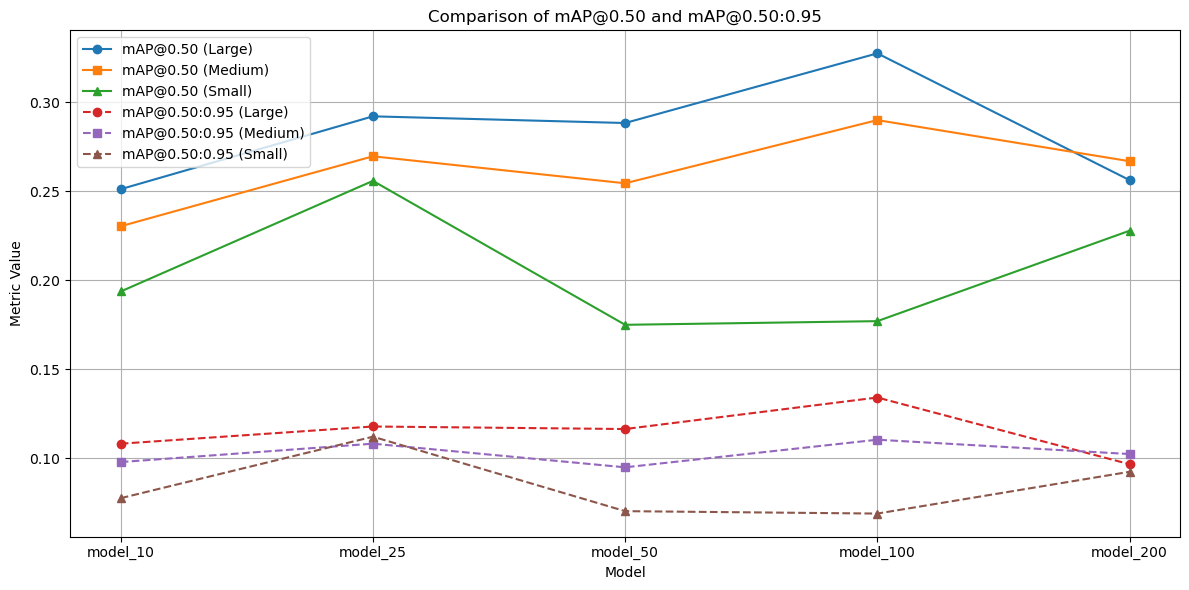

In [17]:

# Convert them to DataFrames
df_l = pd.DataFrame(evaluation_results_l)
df_m = pd.DataFrame(evaluation_results_m)
df_s = pd.DataFrame(evaluation_results_s)

# Specific model labels
model_labels = ['model_10', 'model_25', 'model_50', 'model_100', 'model_200']

# Plotting
plt.figure(figsize=(12, 6))

# Plot for mAP@0.50
plt.plot(df_l['mAP@0.50'], '-o', label='mAP@0.50 (Large)')
plt.plot(df_m['mAP@0.50'], '-s', label='mAP@0.50 (Medium)')
plt.plot(df_s['mAP@0.50'], '-^', label='mAP@0.50 (Small)')

# Plot for mAP@0.50:0.95
plt.plot(df_l['mAP@0.50:0.95'], '--o', label='mAP@0.50:0.95 (Large)')
plt.plot(df_m['mAP@0.50:0.95'], '--s', label='mAP@0.50:0.95 (Medium)')
plt.plot(df_s['mAP@0.50:0.95'], '--^', label='mAP@0.50:0.95 (Small)')

# Setting the labels and title
plt.title('Comparison of mAP@0.50 and mAP@0.50:0.95')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(range(len(df_l)), model_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
